# Create table of artists and the number of artworks created by them

In [ ]:
import time
from selenium import webdriver
from artscraper.functions import random_wait_time
from selenium.webdriver.common.by import By

In [ ]:
webpage='https://artsandculture.google.com/category/artist'
executable_path='geckodriver'
min_wait_time=5

In [ ]:
# Launch Firefox browser
driver = webdriver.Firefox(executable_path=executable_path)

# Get Google Arts & Culture webpage listing all artists
driver.get(webpage)

In [ ]:
# Get scroll height after first time page load
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(random_wait_time(min_wait=min_wait_time))
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [ ]:
# Find xpaths containing artist links
elements = driver.find_elements('xpath', '//*[contains(@href,"categoryId=artist")]')

# List to store artist links
list_links = []
list_names = []
list_number_of_works = []

# Go through each xpath containing an artist link
for element in elements:
    #Find name of artist
    name_element = element.find_element(By.CLASS_NAME, 'lR1tHf')
    name = name_element.get_attribute('innerHTML')
    #Find number of works by artist
    num_works_element = element.find_element(By.CLASS_NAME, 'f8qA6c')
    num_works_text = num_works_element.get_attribute('innerHTML')
    num_works = int(num_works_text.rsplit(' ')[0].replace(',',''))
    # Extract link to webpage
    link = element.get_attribute('href')
    # Remove trailing text
    link = link.replace('?categoryId=artist', '')
    # Append to list
    list_names.append(name)
    list_number_of_works.append(num_works)
    list_links.append(link)

In [ ]:
# Close driver
driver.close()

In [1]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'name': list_names, 'number of works': list_number_of_works, 'URL': list_links})
df.set_index('name', inplace=True)
df_sorted = df.sort_values(by=['number of works'], ascending=False)
df_sorted.to_csv('artists_information.csv')

In [2]:
df = pd.read_csv('artists_information.csv')

In [3]:
df = df.drop_duplicates(subset=['URL'])

In [4]:
from IPython.display import HTML

In [5]:
HTML(df.to_html(render_links=True, escape=False))

,Unnamed: 0,name,number of works,URL
0,142,Alfred Eisenstaedt,192000,https://artsandculture.google.com/entity/alfred-eisenstaedt/m0229mr
1,668,Ralph Morse,120000,https://artsandculture.google.com/entity/ralph-morse/m0bjy92
2,419,Carl Mydans,115000,https://artsandculture.google.com/entity/carl-mydans/m03ny43
3,696,George Silk,97000,https://artsandculture.google.com/entity/george-silk/m08_px0
4,4184,Loomis Dean,88600,https://artsandculture.google.com/entity/loomis-dean/m02q6y4q
5,4867,Peter Stackpole,83100,https://artsandculture.google.com/entity/peter-stackpole/m04_11wv
6,4009,Nina Leen,51600,https://artsandculture.google.com/entity/nina-leen/m05wvf3g
7,174,Margaret Bourke-White,44000,https://artsandculture.google.com/entity/margaret-bourke-white/m02grhl
8,2961,Cornell Capa,35300,https://artsandculture.google.com/entity/cornell-capa/m0b65t7
9,2888,Gjon Mili,34500,https://artsandculture.google.com/entity/gjon-mili/m089090


In [6]:
# Total number of artworks
total = df['number of works'].sum()
print(total)

1178854


In [7]:
# First 11 entries are all photographers
first_11 = df['number of works'][0:11].sum()
print(first_11)

891200


In [8]:
print(total - first_11)

287654


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='number of works', ylabel='Count'>

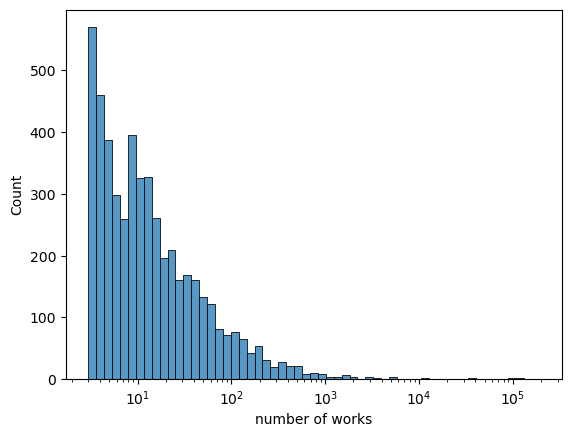

In [10]:
sns.histplot(data=df, x="number of works", log_scale=True)

In [11]:
import numpy as np

<AxesSubplot:>

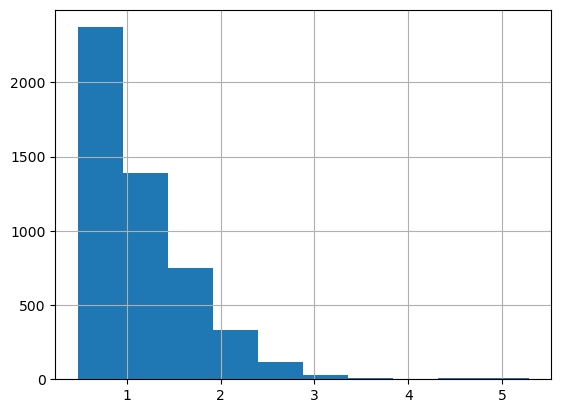

In [12]:
np.log10(df['number of works']).hist()